In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('../data/aviation_final.csv', index_col=0)

In [10]:
air_tractor = df[df['make'] == "Air Tractor"]

In [11]:
grumman = df[df['make'] == "Grumman"]

In [13]:
air_tractor['injury_severity'].value_counts(normalize=True)*100

non-fatal    79.1423
fatal        20.8577
Name: injury_severity, dtype: float64

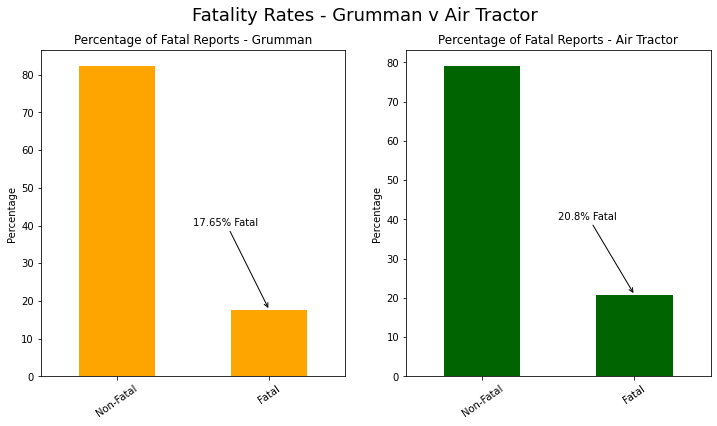

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(grumman['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[0], color='orange',
    kind='bar', title = 'Percentage of Fatal Reports - Grumman', ylabel="Percentage", rot=35)
ax[0].annotate(text="17.65% Fatal", xy=(1, 17.65), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'))
ax[0].set_xticklabels(["Non-Fatal", "Fatal"])

(air_tractor['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[1], color='darkgreen',
    kind='bar', title = 'Percentage of Fatal Reports - Air Tractor', ylabel="Percentage", rot=35)
ax[1].set_xticklabels(["Non-Fatal", "Fatal"])
ax[1].annotate(text="20.8% Fatal", xy=(1, 20.8), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'))
plt.suptitle("Fatality Rates - Grumman v Air Tractor", fontsize=18);

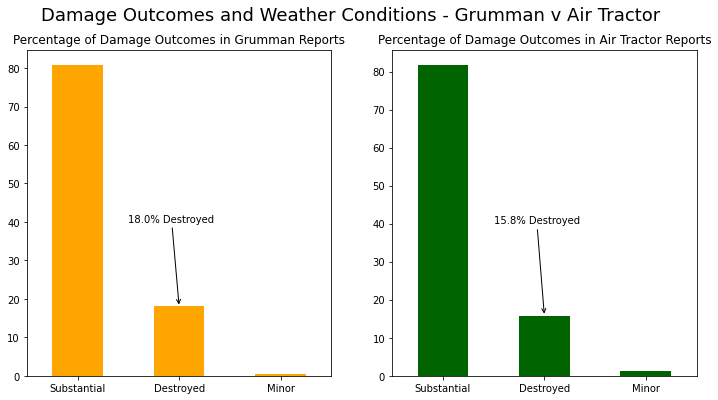

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

(grumman["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[0], title="Percentage of Damage Outcomes in Grumman Reports", rot=0, color='orange')

(air_tractor["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[1], title="Percentage of Damage Outcomes in Air Tractor Reports", rot=0, color='darkgreen')

ax[0].annotate(text="18.0% Destroyed", xy=(1, 18.), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))

ax[1].annotate(text="15.8% Destroyed", xy=(1, 15.8), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))
plt.suptitle("Damage Outcomes and Weather Conditions - Grumman v Air Tractor", fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/New_Grumman_v_AT_dmg_weather_smaller.jpg');

In [18]:
(grumman["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100)

Substantial    80.748663
Destroyed      18.181818
Minor           0.534759
Name: aircraft_damage, dtype: float64

In [19]:
(air_tractor["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100)

Substantial    81.676413
Destroyed      15.789474
Minor           1.364522
Name: aircraft_damage, dtype: float64

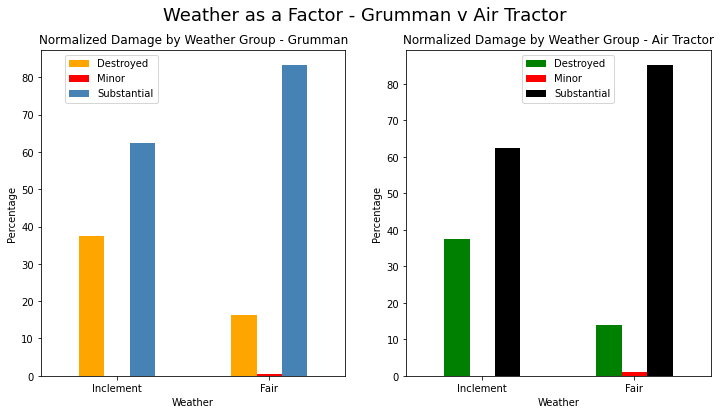

In [21]:
grumman_grouped_data = grumman.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grumman_grouped_data.drop(["Unknown"], axis=1, inplace=True)
grumman_normalized_data = grumman_grouped_data.div(grumman_grouped_data.sum(axis=1), axis=0) * 100

at_grouped_data = air_tractor.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
at_grouped_data.drop(["Unknown"], axis=1, inplace=True)
at_normalized_data = at_grouped_data.div(at_grouped_data.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

grumman_normalized_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Grumman", ax=ax[0], ylabel="Percentage",
     color=["orange", "red", 'steelblue', 'turquoise'])

ax[0].set_xticklabels(["Inclement", "Fair"])
ax[0].legend_.set_title("Aircraft Damage")
ax[0].legend(bbox_to_anchor=(0.4, 1))

at_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Air Tractor", ax=ax[1], 
    ylabel="Percentage", color=["green", "red", 'black', 'yellow'])
ax[1].set_xticklabels(["Inclement", "Fair"])
ax[1].legend_.set_title("Aircraft Damage")
ax[1].legend(bbox_to_anchor=(0.7, 1))
plt.suptitle("Weather as a Factor - Grumman v Air Tractor", fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/New_Grumman_v_AT_weather_last.jpg');

# Both planes have 37.5% destruction rate in poor weather, Air Tractor 13.8% destruction rate in clear weather, which is better than Grumman at 16.1% In comparing both manufacturers from a wide lens, Grumman has better mortality prevention, whereas Air Tractor's planes are more damage resistant.